In [2]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics


In [3]:
class_names = np.array([
    "Sedex",
    "MVT",
    "VMS",
    "Skarn"
])
path_file = "D:/Desktop/论文数据整理/完整数据复制3.27删除3IQR.xlsx"
data = pd.read_excel(path_file)
# print(data.describe())
df = data.loc[:,['type','Cd','Mn','Ag','Cu','Pb','Sn','Ga','In','Sb','Co','Ge','Fe']]



for col_i in range(1, 13):
    df.iloc[:, col_i] = pd.to_numeric(df.iloc[:, col_i], errors="coerce")
    
    
column_names = df.columns.tolist()
print(column_names)

['type', 'Cd', 'Mn', 'Ag', 'Cu', 'Pb', 'Sn', 'Ga', 'In', 'Sb', 'Co', 'Ge', 'Fe']


In [4]:
# 对空缺值进行填补
Sedex = df.loc[df['type']=='Sedex',:] 
MVT = df.loc[df['type']=='MVT',:]
VMS = df.loc[df['type']=='VMS',:]
Skarn = df.loc[df['type']=='Skarn',:]


KI = KNNImputer(n_neighbors=5,weights='distance')

Sedex_transform = KI.fit_transform(Sedex.iloc[:,1:])
Sedex_transform = pd.DataFrame(Sedex_transform,index=Sedex.type,columns=Sedex.columns[1:])

MVT_transform = KI.fit_transform(MVT.iloc[:,1:])
MVT_transform = pd.DataFrame(MVT_transform,index=MVT.type,columns=MVT.columns[1:])

VMS_transform = KI.fit_transform(VMS.iloc[:,1:])
VMS_transform = pd.DataFrame(VMS_transform,index=VMS.type,columns=VMS.columns[1:])

Skarn_transform = KI.fit_transform(Skarn.iloc[:,1:])
Skarn_transform = pd.DataFrame(Skarn_transform,index=Skarn.type,columns=Skarn.columns[1:])

feature = pd.concat([Sedex_transform,MVT_transform,VMS_transform,Skarn_transform], axis=0)
# feature.describe()
# feature.to_excel('Sphalerite_knn.xlsx')


# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


In [5]:
# y = feature.index
# y   #length=2760 
# print(y.value_counts())
# y_int ,index = pd.factorize(y,sort=True)
# # index
# # print(len(feature))
# y= y_int
# print(index)
# print(y)

# y = feature.index
# y   #length=2760 
# print(y.value_counts())
# y_int ,index = pd.factorize(y)
# # index
# # print(len(feature))

# for i, j in zip(y_int, index):
#     print(f"Label: {i}, Code: {j}")
    
    
from sklearn.preprocessing import LabelEncoder

# 假设 labels 是原始标签列表
y_labels = feature.index

# 创建 LabelEncoder 对象并进行标签编码
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y_labels)
## 输出标签和对应的编码
for label, code in zip(y_labels, y):
    print(f"Label: {label}, Code: {code}")

Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sed

Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0


In [6]:
X_train1, X_test1, y_train, y_test = train_test_split(feature, y, test_size=0.2, random_state=0,stratify = y)
# test_indices = X_test1.index

In [7]:

def Log_Std(X):
    X_log = np.log(X)
    X_log_std = StandardScaler().fit_transform(X_log)
    
    return X_log_std



In [8]:
X_train_s = Log_Std(X_train1)
X_test_s = Log_Std(X_test1)

X_train = X_train_s
X_test = X_test_s

In [9]:
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [23]:
# test_indices.shape

最大得分：0.9881756756756757 子树数量为：31


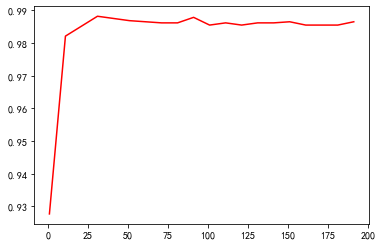

In [33]:
# # 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
# score_lt = []

# # 每隔10步建立一个随机森林，获得不同n_estimators的得分
# for i in range(0,200,10):
#     rfc = RandomForestClassifier(n_estimators=i+1
#                                 ,random_state=0)
#     score = cross_val_score(rfc,X_train, y_train, cv=10).mean()
#     score_lt.append(score)
# score_max = max(score_lt)
# print('最大得分：{}'.format(score_max),
#       '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# # 绘制学习曲线
# x = np.arange(1,201,10)
# plt.subplot(111)
# plt.plot(x, score_lt, 'r-')
# plt.show()

In [34]:
# # 建立n_estimators为45的随机森林
# rfc = RandomForestClassifier(n_estimators=31, random_state=0)

# # 用网格搜索调整max_depth
# param_grid = {'max_depth':np.arange(1,20)}
# GS = GridSearchCV(rfc, param_grid, cv=10)
# GS.fit(X_train, y_train)

# best_param = GS.best_params_
# best_score = GS.best_score_
# print(best_param, best_score)

{'max_depth': 17} 0.9881756756756757


In [38]:
# # 用网格搜索调整max_features
# param_grid = {'max_features':np.arange(1,12)}

# rfc = RandomForestClassifier(n_estimators=31
#                             ,random_state=0
#                             ,max_depth=17)
# GS = GridSearchCV(rfc, param_grid, cv=10)
# GS.fit(X_train, y_train)
# best_param = GS.best_params_
# best_score = GS.best_score_
# print(best_param, best_score)

{'max_features': 2} 0.9898648648648647


In [10]:

param_grid ={

    "n_estimators":[31],
    "max_depth":[8],
    "max_features":[3],
    
}

clf = RandomForestClassifier(random_state = 0)
# crf = RandomForestClassifier(max_depth=7, max_features=0.2, n_estimators=120)
grid = GridSearchCV(clf,param_grid=param_grid,cv=10, scoring="f1_macro", n_jobs=-1, refit=True, )

grid.fit(X_train, y_train)
# print(grid.best_params_,
#      grid.best_score_,
#      grid.best_estimator_,
#      grid.best_index_)

# rfc = RandomForestClassifier(n_estimators=31,
#                              random_state=0,
#                              max_depth=8,
#                              max_features=3
#                             )

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': [3],
                         'n_estimators': [31]},
             scoring='f1_macro')

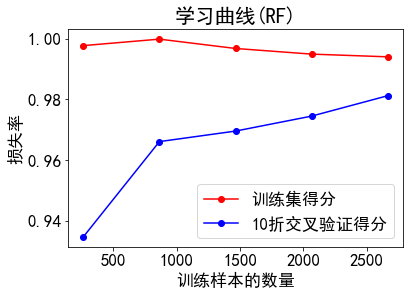

In [29]:
%matplotlib inline
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    grid, X_train, y_train,cv=10,n_jobs=-1,
    train_sizes=np.linspace(0.1,1,5), scoring="f1_macro"
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis =1)
plt.rc('font',family='simhei',size=17)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',label='训练集得分')
plt.plot(train_sizes, test_scores_mean, 'o-', color='b',label='10折交叉验证得分')
plt.xlabel("训练样本的数量")
plt.ylabel("损失率")
plt.title("学习曲线(RF)")
plt.legend(loc="best")
plt.show()

In [34]:
# crf = RandomForestClassifier(max_depth=8, max_features=3, n_estimators=31)
# crf.fit(X_train, y_train)
# estimator = crf.estimators_[0]

In [82]:
# from sklearn.tree import export_graphviz

# # 导出为dot文件
# dot_data = export_graphviz(estimator, 
#                            out_file=None,
#                            feature_names=feature.columns,class_names = class_names,
#                            filled=True,rounded=True,
#                            special_characters=True)

# # # 画决策树
# # dot_data = tree.export_graphviz(clf_DT,
# #                                 out_file=None,
# #                                feature_names=feature.columns,
# #                                class_names = class_names,
# #                                 filled=True,rounded=True,
# #                                 special_characters=True
# #                                )
# grap = graphviz.Source(dot_data)
# grap.render('rftreexiao')
# >>> doctest_mark_exe()
#     >>> import graphviz
#     >>> dot = graphviz.Graph(name='spam', directory='doctest-output')
#     >>> dot.render(format='png').replace('\\', '/')
#     'doctest-output/spam.gv.png'
#     >>> dot.render(outfile='spam.svg').replace('\\', '/')
#     'doctest-output/spam.svg'


In [11]:
y_test_pred = grid.predict(X_test)
t_train_pred = grid.predict(X_train)
print('训练集的准确率:%.3f' % grid.score(X_train, y_train))
print('测试集的准确率:%.3f' % grid.score(X_test, y_test))
# 训练集的准确率:0.993
# 测试集的准确率:0.972


训练集的准确率:0.991
测试集的准确率:0.969


In [12]:
import joblib as jl
jl.dump(grid, 'Sphalerite Classifier_rf1.pkl')

['Sphalerite Classifier_rf1.pkl']

In [67]:
# df_t_f = pd.DataFrame(index = test_indices)
# df_t_f['Cd'] = X_test1['Cd']

# df_t_f['True_Label'] = y_test
# pred_series = pd.Series(y_test_pred, index=X_test1.index)
# # 将预测标签列添加到表格中
# df_t_f['Predicted_Label'] = pred_series
# df_t_f.to_excel("df_t_f1.xlsx")

(740,)

In [13]:
# y_test_pred_list = y_test_pred.tolist()
# y_test_list = y_test.tolist()
# print('预测值：',y_test_pred_list)
# print('真实值：',y_test_list)

# for i in range(len(y_test)):
    
#     if y_test_list[i] != y_test_pred_list[i]:
#         print("样本索引：", i)
#         print("预测值：", y_test_pred[i])
#         print("真实值：", y_test[i])
#         print("--------------------")

In [13]:
print(classification_report(y_test, y_test_pred, output_dict=False))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.98      0.96      0.97       236
           2       0.97      0.95      0.96       100
           3       0.97      0.97      0.97       119

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.97       740

[[282   3   0   0]
 [ 10 226   0   0]
 [  0   1  95   4]
 [  0   0   3 116]]


RF的混淆矩阵
[[282   3   0   0]
 [ 10 226   0   0]
 [  0   1  95   4]
 [  0   0   3 116]]
RF
[[0.99 0.01 0.   0.  ]
 [0.04 0.96 0.   0.  ]
 [0.   0.01 0.95 0.04]
 [0.   0.   0.03 0.97]]


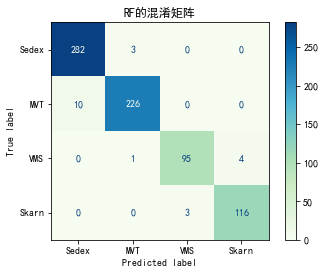

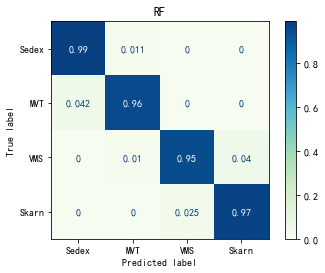

In [14]:
titles_options = [
    ("RF的混淆矩阵", None),
    ("RF", "true"),
]
np.set_printoptions(precision=2)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        grid,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.GnBu,
        normalize=normalize,
        
    )

    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()


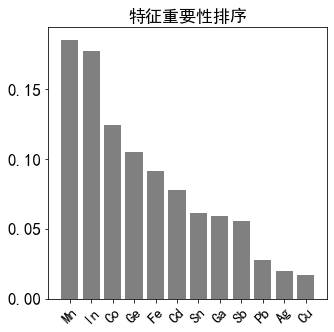

Mn - 0.185
In - 0.177
Co - 0.124
Ge - 0.105
Fe - 0.091
Cd - 0.078
Sn - 0.061
Ga - 0.059
Sb - 0.055
Pb - 0.028
Ag - 0.020
Cu - 0.017


<Figure size 432x288 with 0 Axes>

In [15]:
# from matplotlib import font_manager
# my_font = font_manager.FontProperties(fname='/Anaconda3/Library/Fonts/Songti.ttc')

feature_names = list(feature.columns)
feature_importances = grid.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]
num_features = len(feature_importances)
plt.rc('font',family='simhei',size=17)
plt.figure(figsize=(5, 5))
plt.title("特征重要性排序",size=17)
plt.bar(range(num_features), feature_importances[indices], color="grey", align="center")
plt.xticks(range(num_features), [feature_names[i] for i in indices], rotation='45',size=15)
plt.xlim([-1, num_features])
plt.show()
plt.savefig(r'D:\Desktop\论文数据整理\全部元素./feature importances.png', dpi=600)
for i in indices:
    print ("{0} - {1:.3f}".format(feature_names[i], feature_importances[i]))

In [68]:
# # 读取表一和表二的数据
# table1 = pd.read_excel('df_t_f1.xlsx')
# table2 = pd.read_excel('sphalerite_iqr_initi_knn.xlsx')

# # 合并两个表
# merged_table = pd.merge(table1, table2, on='Cd')

# # 打印合并后的表
# print(merged_table)
# merged_table.to_excel('merge1.xlsx')

In [16]:
report = classification_report(y_test, y_test_pred, output_dict=True)
catch = {}
for key, val in report.items():
    if key != 'accuracy':
        catch[key] = {}
        for subkey, subval in val.items():
            catch[key][subkey] = []
    else:
        catch[key] = []

for i in range(50):
    # 划分数据集
    X_train1, X_test1, y_train, y_test = train_test_split(feature, y, test_size=0.2, random_state=i)
    
    X_train10 = Log_Std(X_train1)
    X_test10 = Log_Std(X_test1)

    X_train = X_train10
    X_test = X_test10
    # 创建SVM分类模型
    
    # 训练模型
    grid.fit(X_train, y_train)
    
    # 预测测试集
    temreport = classification_report(y_test, grid.predict(X_test), output_dict=True)
    
    # 生成分类报告
    for key, val in temreport.items():
        if key != 'accuracy':
            for subkey, subval in val.items():
                catch[key][subkey].append(temreport[key][subkey])
        else:
            catch[key].append(temreport[key])

for key, val in catch.items():
    if key != 'accuracy':
        for subkey, subval in val.items():
            tem = catch[key][subkey]
            catch[key][subkey] = f'{np.mean(tem):2.3f}' + '±' + f'{np.std(tem):2.3f}'
    else:
        tem = catch[key]
        catch[key] = f'{np.mean(tem):2.3f}' + '±' + f'{np.std(tem):2.3f}'

for key, val in catch.items():
    if key != 'accuracy':
        temdf = pd.json_normalize(catch[key])
        try:
            i = int(key)
            print(index[i],'\n', temdf)
        except:
            print(key,'\n', temdf)
    else:
        print(key,'\n', val)

0 
      precision       recall     f1-score         support
0  0.969±0.011  0.986±0.010  0.977±0.007  284.440±10.850
1 
      precision       recall     f1-score         support
0  0.979±0.013  0.962±0.012  0.971±0.009  236.060±12.174
2 
      precision       recall     f1-score        support
0  0.986±0.018  0.966±0.019  0.976±0.012  100.700±8.420
3 
      precision       recall     f1-score        support
0  0.975±0.016  0.984±0.015  0.979±0.010  118.800±8.476
accuracy 
 0.975±0.006
macro avg 
      precision       recall     f1-score        support
0  0.977±0.007  0.975±0.007  0.976±0.007  740.000±0.000
weighted avg 
      precision       recall     f1-score        support
0  0.976±0.006  0.975±0.006  0.975±0.006  740.000±0.000
